In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif, f_classif

from imblearn.over_sampling import SMOTE

from sklearn.metrics import matthews_corrcoef, make_scorer, f1_score, confusion_matrix , classification_report

import warnings
warnings.filterwarnings("ignore")

In [43]:
N_SPLITS = 5
SEED = 121

In [44]:
input_folder = 'data/'
def read_data(file, labels):
    data = pd.read_csv(input_folder+file, index_col=0).T

    if len(labels) == 0:
        return (data, np.array([]))

    X = data.iloc[:, :-len(labels)]
    y = data[labels]
    return (X, y)


X1, Y1 = read_data('Dataset_1_Training.csv', ["CO: 1", "CO: 2"])
co1 = Y1["CO: 1"]
co2 = Y1["CO: 2"]

X1_t, _ = read_data('Dataset_1_Testing.csv', [])

X2, Y2 = read_data('Dataset_2_Training.csv', [
                   "CO: 3", "CO: 4", "CO: 5", "CO: 6"])
co3 = Y2["CO: 3"]
co4 = Y2["CO: 4"]
co5 = Y2["CO: 5"]
co6 = Y2["CO: 6"]

X2_t, _ = read_data('Dataset_2_Testing.csv', [])

# Choosing one class to work on

In [45]:
target = "CO: 1"
X = X1
y = co1.astype(np.int32)
X_gen_res = X1_t

In [46]:
X.shape, y.shape, X_gen_res.shape, y.value_counts()

((130, 22283),
 (130,),
 (100, 22283),
 0    97
 1    33
 Name: CO: 1, dtype: int64)

# Lets check if the classes are balanced?

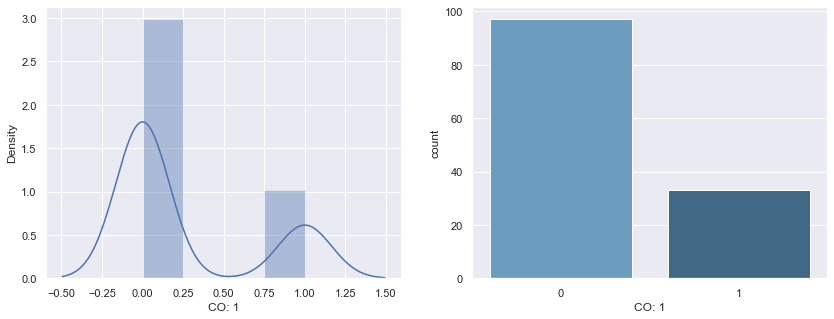

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
sns.distplot(y, ax=ax[0])
sns.countplot(y, ax=ax[1], palette="Blues_d")
plt.show()

## Lets see the feature distribution

In [48]:
# f, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
# for index, value in enumerate(X.columns[:14]):
#     sns.distplot(X[value], ax=ax[index//4, index % 4])

# f.delaxes(ax[3, 2])
# f.delaxes(ax[3, 3])
# plt.tight_layout()
# plt.show()


# Feature Selection

## 1. Standard Scaling

In [49]:
def pre_process(X ,p_values):
    X_std = StandardScaler().fit_transform(X)
    X = pd.DataFrame(X_std, columns=X.columns, index=X.index)
    X = X[p_values.index]
    return X

In [50]:
X_std = StandardScaler().fit_transform(X)

X = pd.DataFrame(X_std, columns=X.columns, index=X.index)
X.head()

ID_REF,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_22274,gene_22275,gene_22276,gene_22277,gene_22278,gene_22279,gene_22280,gene_22281,gene_22282,gene_22283
Train_01,0.837788,0.148794,-0.916419,0.339528,0.149935,-0.834020,0.639799,0.677738,-1.102133,0.692759,...,-0.888134,0.588549,-0.516935,-0.586973,-0.734479,-0.264875,-1.369751,-1.510214,-0.959982,-0.918429
Train_02,0.509399,-0.593266,0.474776,0.570960,-0.689170,0.567641,-0.675247,0.512705,-0.698882,-0.440360,...,1.708042,-0.108815,-1.058943,-0.846226,-0.626933,-1.342752,0.128626,1.009027,-0.882873,-0.426393
Train_03,1.143790,0.576674,-0.178598,0.213696,-0.445810,0.377018,1.407301,1.000932,-0.885270,-0.681260,...,-0.730554,-0.898707,-0.811591,-0.606170,-0.884515,0.060837,0.764209,0.704623,-1.176243,-0.436153
Train_04,-0.216968,-0.025480,0.364304,0.973126,0.524444,0.690055,1.234428,0.610814,-1.188999,0.304359,...,-0.692872,0.102738,-0.706692,-0.782407,0.121325,-0.064709,1.295316,-1.849230,-0.867077,0.676987
Train_05,0.022817,0.749803,0.194136,0.341878,0.090201,-2.802071,-0.293446,1.173452,-1.034285,-0.105349,...,-0.230053,0.357692,-1.075373,-1.154078,-1.022667,-0.627340,0.677824,0.375130,-0.863006,0.123104


## 2. Test train split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=SEED)

In [52]:
y_train.value_counts()

0    68
1    23
Name: CO: 1, dtype: int64

## 3. using SMOTE to balance the classes

In [53]:
# smote = SMOTE(sampling_strategy='minority')
# X_train, y_train = smote.fit_resample(X_train, y_train)

# y_train.value_counts()

## 4. If SMOTE is not allowed we can Oversample the classes

In [54]:
# test = pd.concat([X_train, y_train], axis=1)

# df_class_0 = test[test["CO: 3"]==0]
# df_class_1 = test[test["CO: 3"]==1]

# print(df_class_0.shape,df_class_1.shape)

# df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# print('Random over-sampling:')
# print(df_test_over["CO: 3"].value_counts())

# X_train = df_test_over.drop("CO: 3",axis='columns')
# y_train = df_test_over["CO: 3"]

## 5. shape of the data before feteature selection

In [55]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((91, 22283), (91,), (39, 22283), (39,))

## 6. Feature Selection Using ANOVA

In [56]:
selector = f_classif(X_train, y_train)
p_values = pd.Series(selector[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True, inplace=True)
p_values = p_values[p_values < 0.05]
X_train = X_train[p_values.index]
X_test = X_test[p_values.index]

## 7. shape of the data after feature selection

In [57]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((91, 3032), (91,), (39, 3032), (39,))

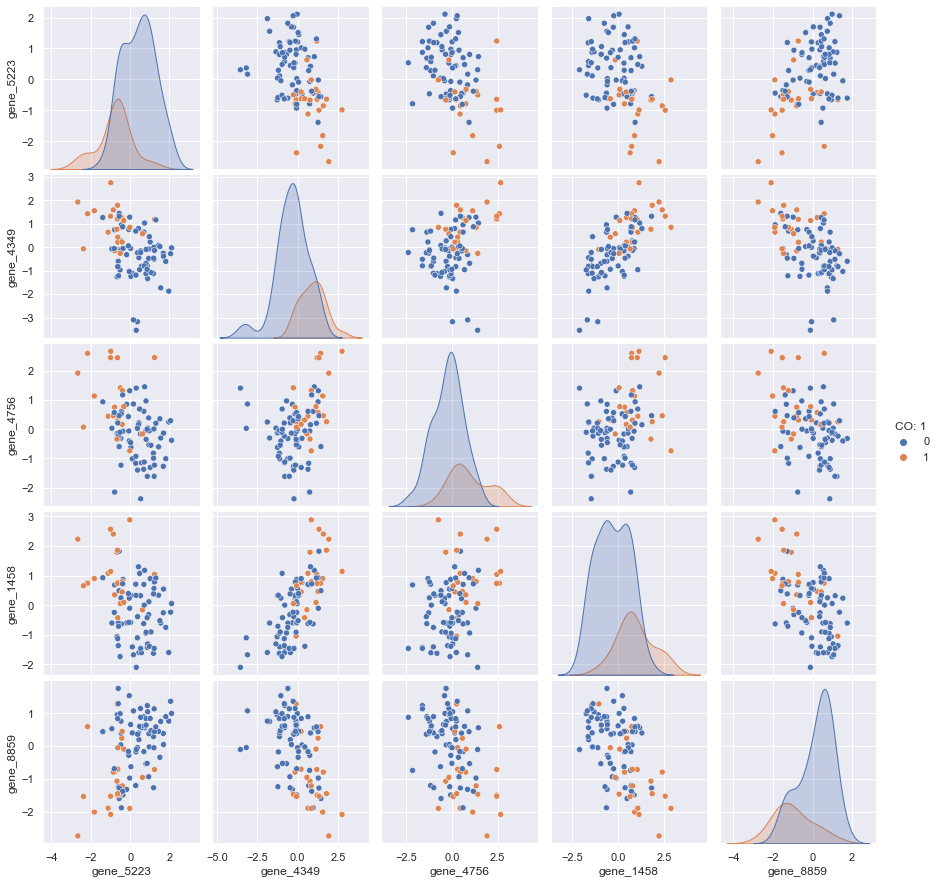

In [58]:
sns.set()
cols = X_train.columns[:5]
temp = pd.concat([X_train[cols],y_train],axis=1)
sns.pairplot(temp, hue= target, size = 2.5)
plt.show()

# Modeling and Evaluation

1. Generic function to train the model

In [59]:
def run_model(model, X, y, X_test, y_test):
    model.fit(X, y)
    y_test_pred = model.predict(X_test)

    # Testing set performance
    test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
    return test_mcc



def run_model_(model, X, y, X_test, y_test, n_fold=2):
    cv = cross_val_score(model, X, y,  cv=n_fold, scoring=make_scorer(
        f1_score, greater_is_better=True))

    print(f"Cross validation Avg. f1_score: {cv.mean()}")

    model.fit(X, y)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(classification_report(y_train, y_train_pred))
    print(classification_report(y_test, y_test_pred))

    # Testing set performance
    test_mcc = matthews_corrcoef(y_test, y_test_pred)  # Calculate MCC
    print(f"Testing MCC: {test_mcc}")
    
    # Plotting heatmap
    sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True,)


# LR

Cross validation Avg. f1_score: 0.7569169960474309
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.71      0.50      0.59        10

    accuracy                           0.82        39
   macro avg       0.78      0.72      0.74        39
weighted avg       0.81      0.82      0.81        39

Testing MCC: 0.49044126607370664


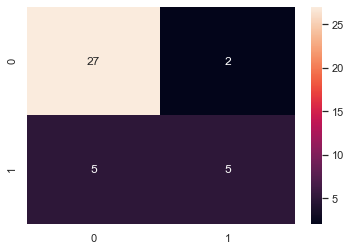

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', C=2, penalty='l2', max_iter=1000)
run_model_(lr, X_train, y_train, X_test, y_test, 2)


# Tuning the hyperparameters for LR

<AxesSubplot:>

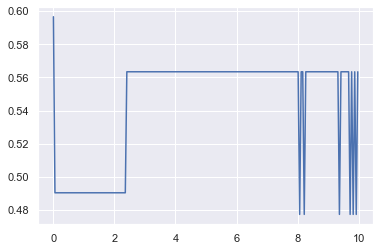

In [61]:
mcc_scores = []
search_space = np.arange(0.01, 10, 0.05)

for i in search_space:
    model = LogisticRegression(class_weight='balanced', C=i, penalty='l2')
    mcc_scores.append(run_model(model, X_train, y_train, X_test, y_test))

sns.lineplot(search_space, mcc_scores)

In [62]:
mcc_scores


[0.596551724137931,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.49044126607370664,
 0.490441266

Cross validation Avg. f1_score: 0.7210144927536232
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.70      0.70      0.70        10

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39

Testing MCC: 0.596551724137931


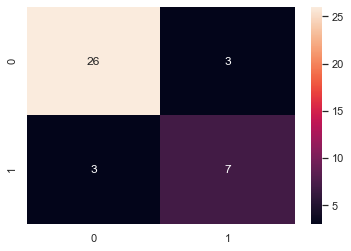

In [63]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', C=0.01,
                        penalty='l2', max_iter=1000)
run_model_(lr, X_train, y_train, X_test, y_test, 2)


# AdaBoost

Cross validation Avg. f1_score: 0.34523809523809523
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        68
           1       1.00      0.91      0.95        23

    accuracy                           0.98        91
   macro avg       0.99      0.96      0.97        91
weighted avg       0.98      0.98      0.98        91

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        29
           1       0.42      0.50      0.45        10

    accuracy                           0.69        39
   macro avg       0.62      0.63      0.62        39
weighted avg       0.71      0.69      0.70        39

Testing MCC: 0.24467509146445976


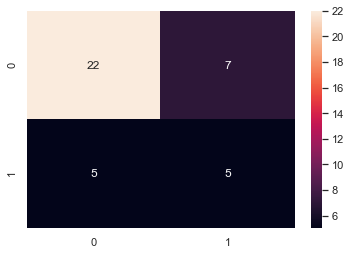

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=10, learning_rate=.9, random_state=SEED)

run_model_(ada, X_train, y_train, X_test, y_test, 2)


# Tuning the hyperparameters for AdaBoost

In [23]:

search_space_lr = np.arange(0.01, 1, 0.05)
search_space_max_depth = np.arange(1, 5, 1)
search_space_estimators = np.arange(2, 30, 5)

mcc_ = []

for i in search_space_max_depth:
    for j in search_space_lr:
        for k in search_space_estimators:
            model = AdaBoostClassifier(
                DecisionTreeClassifier(max_depth=i), algorithm="SAMME", n_estimators=k, learning_rate=j, random_state=SEED)
            
            temp = run_model(model, X_train, y_train, X_test, y_test)

            mcc_.append((temp, (i, j, k)))
            

In [24]:
sorted(mcc_, reverse=True)[0:5]

[(0.5453976310059035, (2, 0.76, 7)),
 (0.5146140167221416, (2, 0.9600000000000001, 7)),
 (0.5146140167221416, (2, 0.91, 7)),
 (0.49913718658749795, (2, 0.01, 7)),
 (0.49913718658749795, (1, 0.91, 7))]

Cross validation Avg. f1_score: 0.2619047619047619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.64      0.70      0.67        10

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39

Testing MCC: 0.5453976310059035


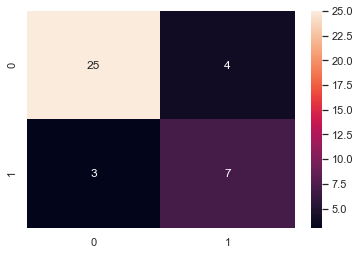

In [40]:
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=7, learning_rate=0.76, random_state=SEED)

run_model_(ada, X_train, y_train, X_test, y_test, 2)


Cross validation Avg. f1_score: 0.7346153846153847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.46      0.60      0.52        10

    accuracy                           0.72        39
   macro avg       0.65      0.68      0.66        39
weighted avg       0.75      0.72      0.73        39

Testing MCC: 0.33218191941495984


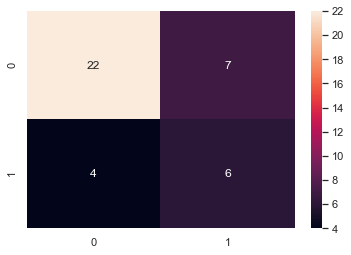

In [42]:
ada = AdaBoostClassifier(
    LogisticRegression(class_weight='balanced'), algorithm="SAMME", n_estimators=17, learning_rate=0.95, random_state=SEED)

run_model_(ada, X_train, y_train, X_test, y_test, 2)


# Random Forest 

Cross validation Avg. f1_score: 0.5210084033613445
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        68
           1       0.95      0.83      0.88        23

    accuracy                           0.95        91
   macro avg       0.95      0.91      0.92        91
weighted avg       0.95      0.95      0.94        91

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.40      0.20      0.27        10

    accuracy                           0.72        39
   macro avg       0.58      0.55      0.55        39
weighted avg       0.67      0.72      0.68        39

Testing MCC: 0.1261056577510926


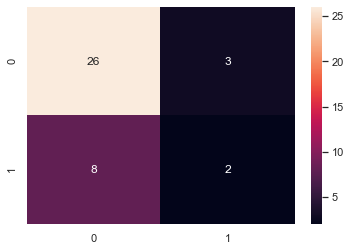

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=SEED)
run_model_(rf, X_train, y_train, X_test, y_test, 2)

# Tuning the hyperparameters for Random Forest

In [29]:
search_space_max_depth = np.arange(1, 5, 1)
search_space_estimators = np.arange(2, 30, 5)

mcc_ = []

for i in search_space_max_depth:
    for j in search_space_estimators:
        model = rf = RandomForestClassifier(
            n_estimators=j, max_depth=i, random_state=SEED)

        temp = run_model(model, X_train, y_train, X_test, y_test)

        mcc_.append((temp, (i, j)))


In [30]:
sorted(mcc_, reverse=True)[0:5]

[(0.33742359105871017, (4, 17)),
 (0.33742359105871017, (3, 27)),
 (0.33742359105871017, (3, 22)),
 (0.33742359105871017, (3, 17)),
 (0.27625312572654126, (1, 27))]

Cross validation Avg. f1_score: 0.36309523809523814
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.96      1.00      0.98        23

    accuracy                           0.99        91
   macro avg       0.98      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.57      0.40      0.47        10

    accuracy                           0.77        39
   macro avg       0.69      0.65      0.66        39
weighted avg       0.75      0.77      0.75        39

Testing MCC: 0.33742359105871017


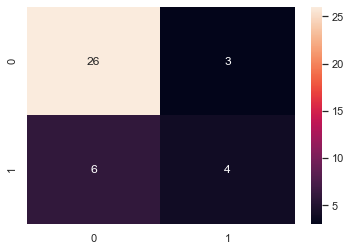

In [37]:
rf = RandomForestClassifier(n_estimators=17, max_depth=4, random_state=SEED)
run_model_(rf, X_train, y_train, X_test, y_test, 2)


Cross validation Avg. f1_score: 0.7346153846153847
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.46      0.60      0.52        10

    accuracy                           0.72        39
   macro avg       0.65      0.68      0.66        39
weighted avg       0.75      0.72      0.73        39

Testing MCC: 0.33218191941495984


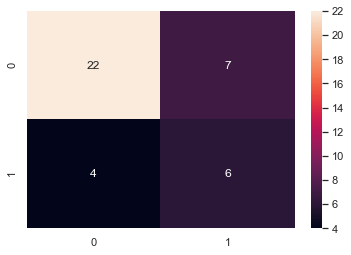

In [38]:
from sklearn.ensemble import VotingClassifier

lr=LogisticRegression(class_weight='balanced', C=0.01, penalty='l2', max_iter=1000)

ada_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2, class_weight='balanced'), algorithm="SAMME", n_estimators=7, learning_rate=0.76, random_state=SEED)

ada_lr = AdaBoostClassifier(
    LogisticRegression(class_weight='balanced'), algorithm="SAMME", n_estimators=17, learning_rate=0.95, random_state=SEED)

rf=RandomForestClassifier(n_estimators=17, max_depth=4, random_state=SEED)

vc = VotingClassifier(estimators=[('lr', lr),('ada_lr', ada_lr)], voting='hard') # Best over all

run_model_(vc, X_train, y_train, X_test, y_test, 2)


Cross validation Avg. f1_score: 0.6521739130434783
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.78      0.70      0.74        10

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

Testing MCC: 0.6539886462510549


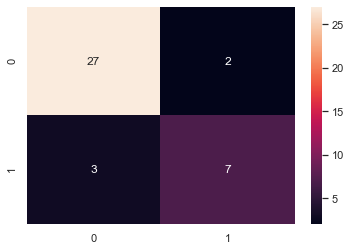

In [123]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scv = SVC(kernel='linear', C=1, gamma=0.1, probability=True)

vc2 = VotingClassifier(
    estimators=[('ada_lr', ada_lr), ('ada_tree', ada_tree),('gnb', gnb)], voting='hard')  # Best over all

run_model_(vc2, X_train, y_train, X_test, y_test, 2)


# Saving the results from final model

In [124]:
np.savetxt(f"predict/{''.join(x for x in target if x.isalnum())}.csv",
           vc2.predict(pre_process(X_gen_res, p_values)), delimiter=',')


# SVM (If you have time)

Cross validation Avg. f1_score: 0.7272727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        23

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        29
           1       0.80      0.40      0.53        10

    accuracy                           0.82        39
   macro avg       0.81      0.68      0.71        39
weighted avg       0.82      0.82      0.80        39

Testing MCC: 0.47739999005770767


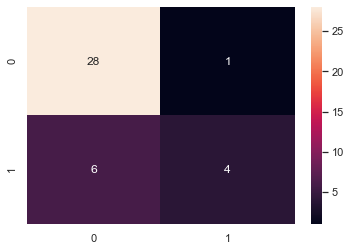

In [110]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',degree=3 , C=0.1, gamma=0.1, random_state=SEED)
run_model_(svc, X_train, y_train, X_test, y_test, 2)

# Grid Search

In [152]:
from sklearn.model_selection import GridSearchCV

n_estimators = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lr = np.arange(0.05,1,0.05)

params = dict(n_estimators=n_estimators, learning_rate=lr)

ada_lr = AdaBoostClassifier(
    LogisticRegression(solver='lbfgs', max_iter=1), algorithm="SAMME", random_state=SEED)

grid_model = GridSearchCV(ada_lr, param_grid=params, cv=3, scoring=make_scorer(matthews_corrcoef, greater_is_better=True), n_jobs=-1, verbose=2)

grid_model.fit(X_train, y_train)

grid_model.best_score_

Fitting 3 folds for each of 285 candidates, totalling 855 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=LogisticRegression(max_iter=1),
                                          random_state=121),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring=make_scorer(matthews_corrcoef), verbose=2)

# Hyperopt for tuning the hyperparameters

In [119]:
from hyperopt import hp, fmin, tpe,Trials,STATUS_OK

space = {'n_estimators': hp.choice('n_estimators', [i for i in range(5,15)]),
         'learning_rate': hp.choice('learning_rate', [0.025, 0.05, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]),
         'max_iter': hp.choice('max_iter', [1, 2, 3]),
    }

def objective(space):

    model = AdaBoostClassifier(
        LogisticRegression(solver='lbfgs', max_iter=space['max_iter']), algorithm="SAMME", n_estimators=space['n_estimators'], learning_rate=space['learning_rate'], random_state=SEED)

    # model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = space['max_depth']),
    #                            n_estimators = space['n_estimators'], 
    #                             learning_rate = space['learning_rate'],
    #                             algorithm = space['algorithm']
    #                              )
    
    mcc = cross_val_score(model, X_train,y_train, scoring=make_scorer(matthews_corrcoef, greater_is_better=True), cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -mcc,"status":STATUS_OK}


trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)
best


100%|██████████| 10/10 [00:25<00:00,  2.56s/trial, best loss: -0.413937780585257]


{'learning_rate': 3, 'max_iter': 1, 'n_estimators': 2}